In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Conv2D, Dense, MaxPool2D, BatchNormalization, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [0]:
#Load the training and test data
df = pd.read_csv('../dataset/train.csv')
df_test = pd.read_csv('../dataset/test.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Convert dataframe to input(X_train) and output label(Y_train) format where input is the values of all the 28x28 pixels in all the images and output label is the actual digit the image represents.
Y_train = df['label']
X_train = df.drop(labels=['label'],axis=1)
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
#Check null values in the labels
Y_train.isnull().values.any()

False

In [7]:
#Check null values in the pixel data
X_train.isnull().values.any()

False

In [0]:
#Normalise the data
X_train = X_train/255
df_test = df_test/255

The CNN Models converge faster on data in (0,1).

In [0]:
#Convert pixel data to 28x28x1 image
X_train_reshape = X_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

 The data of each image is given as 1D array of 784 values. This 1D array is converted to 3D greyscale image using reshape. The reshape function has first param as -1 as the number of rows are unknown. The dimension of each image is 28x28x1. The 1 represents number of channels in greyscale image. For RGB the number of channels is 3.

In [10]:
print(np.shape(X_train_reshape))
print(np.shape(df_test))

(42000, 28, 28, 1)
(28000, 28, 28, 1)


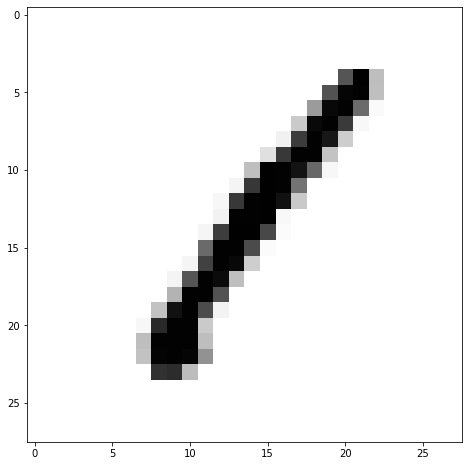

In [0]:
plt.imshow(X_train_reshape[0], cmap='Greys', interpolation=None)
plt.show()

In [0]:
#Convert categorical data to one hot encoding using keras
Y_train = to_categorical(Y_train, num_classes=10)

The digits 0-9 repesent categorical data. They are converted to one-hot-encoded vectors. This is done to achieve output in the form of probabilites for each class. The class with maximum probability is given as predicted output.

In [12]:
print(Y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#Create test dataset from the training data
X_train, X_test, Y_train, Y_test = train_test_split(X_train_reshape, Y_train, test_size=0.1, random_state=42)

In [14]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (37800, 28, 28, 1)
X_test shape: (4200, 28, 28, 1)
Y_train shape: (37800, 10)
Y_test shape: (4200, 10)


**CNN Model**



In [0]:
#CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

Early stopping is used for the model. It enables us to specifiy more number of epoches for training but it stops training once the model doesn't improve further with a patience of a specified number of epoches.
Model Checkpoints are used to save the model weights after each epoch if the val_loss is decreased.

In [0]:
# callbacks = [ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False),
#              EarlyStopping(patience=3, monitor='val_loss', verbose=1)]
callbacks = [ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False)]

In [22]:
history = model.fit(X_train, Y_train, epochs=30, validation_split=0.1, callbacks=callbacks)

Train on 34020 samples, validate on 3780 samples
Epoch 1/30
34020/34020 [==============================] - 6s 169us/step - loss: 0.0118 - acc: 0.9961 - val_loss: 0.0629 - val_acc: 0.9854

Epoch 00001: val_loss improved from inf to 0.06292, saving model to /content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5
Epoch 2/30
34020/34020 [==============================] - 6s 170us/step - loss: 0.0097 - acc: 0.9971 - val_loss: 0.0632 - val_acc: 0.9862

Epoch 00002: val_loss did not improve from 0.06292
Epoch 3/30
34020/34020 [==============================] - 6s 171us/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0628 - val_acc: 0.9868

Epoch 00003: val_loss improved from 0.06292 to 0.06277, saving model to /content/drive/My Drive/Colab Notebooks/digit-recognizer/best.h5
Epoch 4/30
34020/34020 [==============================] - 6s 168us/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.0627 - val_acc: 0.9868

Epoch 00004: val_loss improved from 0.06277 to 0.06274, saving model to /c

In [23]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.991


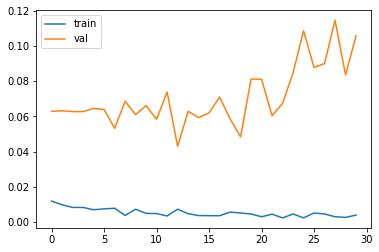

In [25]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [0]:
# predict results
results = model.predict(df_test)
# select the index with maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submit.to_csv("../mnist_predictions.csv",index=False)

<img src='/mnist_submission.png'>